In [1]:
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

In [2]:
import torch
device = torch.device 
if torch.cuda.is_available:
    device = torch.device
    print("Running on the GPU")
else:
    device = torch.device
    print("Running on the CPU")

Running on the GPU


In [3]:
#Dataset import
import pandas as pd
df = pd.read_csv('D:/Python_Projects/Clustering/dataset/Beer.csv')
df.head()

,ID,Name,Alcohol,Bitter,Sweet,Sour,Salty,Malty,review_overall
0,1,Amber,9,47,74,33,0,111,3.85
1,2,Double Bag,18,33,55,16,0,84,4.03
2,3,Long Trail Ale,6,42,43,11,0,62,3.83
3,4,Doppelsticke,31,47,101,18,1,119,4.01
4,5,Sleigh'r Dark Doüble Alt Ale,26,44,45,9,1,95,3.82


In [4]:
df.rename(index=str, columns={'review_overall': 'Review'}, inplace=True) #Rename review_overall column
df.head()

,ID,Name,Alcohol,Bitter,Sweet,Sour,Salty,Malty,Review
0,1,Amber,9,47,74,33,0,111,3.85
1,2,Double Bag,18,33,55,16,0,84,4.03
2,3,Long Trail Ale,6,42,43,11,0,62,3.83
3,4,Doppelsticke,31,47,101,18,1,119,4.01
4,5,Sleigh'r Dark Doüble Alt Ale,26,44,45,9,1,95,3.82


In [5]:
df.describe(include='all') #Values description

,ID,Name,Alcohol,Bitter,Sweet,Sour,Salty,Malty,Review
count,3197.000000,3197,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
unique,NaN,3066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Oktoberfest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1599.000000,NaN,17.055990,36.364404,58.270879,33.145449,1.017204,75.330935,3.747695
std,923.038732,NaN,17.331334,25.791152,34.281310,35.780172,2.132651,39.909338,0.444272
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140000
25%,800.000000,NaN,6.000000,17.000000,33.000000,11.000000,0.000000,45.000000,3.570000
50%,1599.000000,NaN,11.000000,31.000000,54.000000,22.000000,0.000000,73.000000,3.830000
75%,2398.000000,NaN,22.000000,52.000000,77.000000,42.000000,1.000000,103.000000,4.030000


In [ ]:
sns.pairplot(df.drop('ID', axis=1), hue='Name', aspect=1) #ID column has been deleted from the diagram
# hue='Name' - Name will be marked as a hue in the diagram
plt.show()

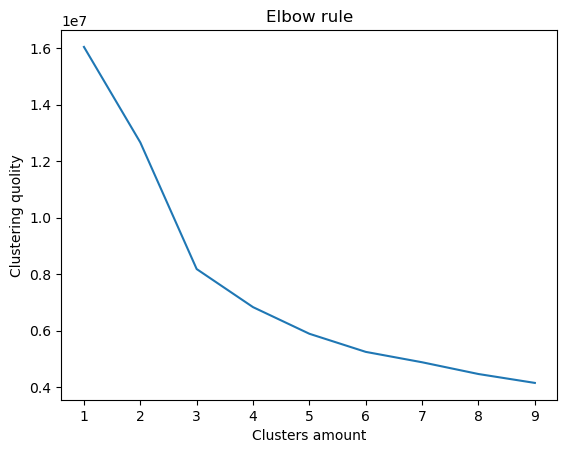

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('D:/Python_Projects/Clustering/dataset/Beer.csv')
X = df.drop(['ID', 'Name'], axis=1) #ID and Name columns has been deleted

#For elbow rule - to determine the number of clusters in a data set.
n_inertia = [] #shows clustering quolity

for i in range(1, 10): #to find out clusters amount
    km = KMeans(n_clusters=i, n_init="auto").fit(X) #fit(X) but not (X,Y) because it is a none supervising learning
    n_inertia.append(km.inertia_)
    
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, 10), y=n_inertia, ax=ax)
ax.set_title('Elbow rule')
ax.set_xlabel('Clusters amount')
ax.set_ylabel('Clustering quolity')
plt.show()

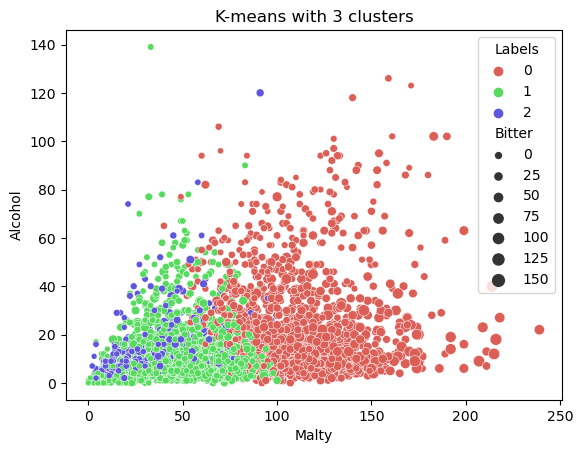

In [10]:
#K-means
X = df.drop(['ID', 'Name'], axis=1) #ID and Name columns has been deleted from the graph
km = KMeans(n_clusters=3, n_init="auto").fit(X)
X['Labels'] = km.labels_

sns.scatterplot(x=X['Malty'], y=X['Alcohol'], hue=X['Labels'], size=X['Bitter'], palette=sns.color_palette('hls', 3))
#The biggest point size on the diagram the more Malty

plt.title('K-means with 3 clusters')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score #Clustering estimation 
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.3275865440783891


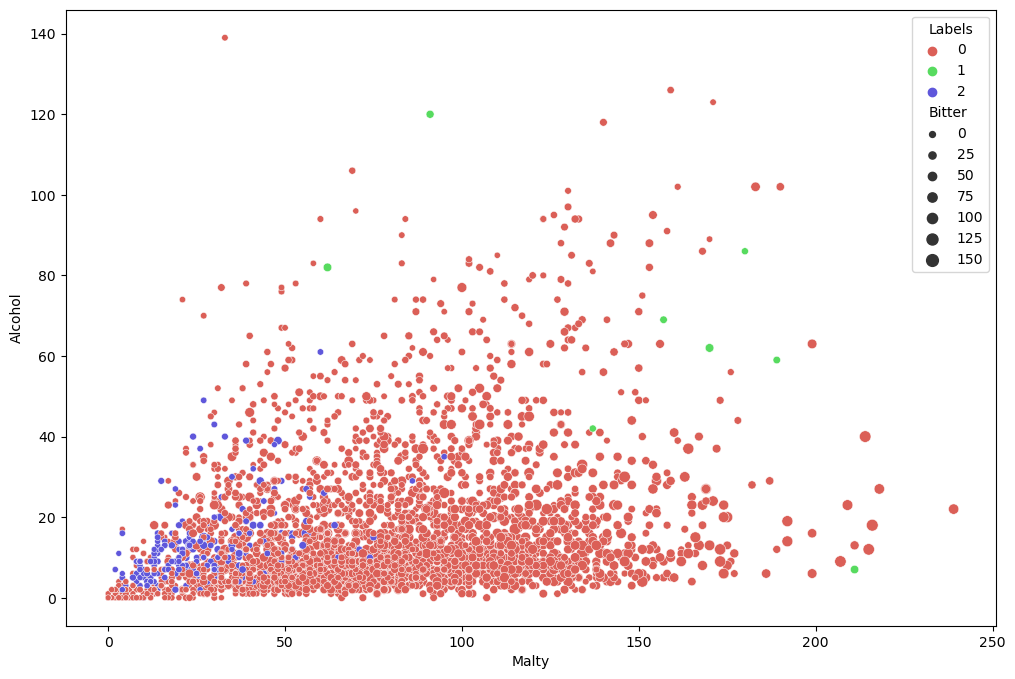

In [14]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X.drop(['Labels'], axis=1)) 

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Malty'], y=X['Alcohol'], hue=X['Labels'], size=X['Bitter'],
                palette=sns.color_palette('hls', 3))
plt.show()

In [15]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.4149050253716719


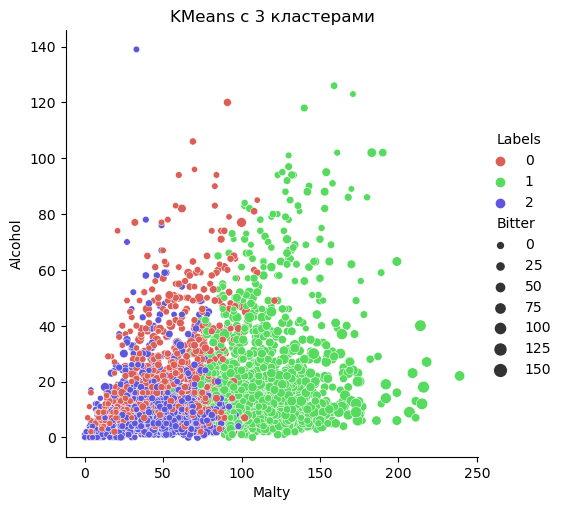

In [21]:
#C-means
from fcmeans import FCM

fcm = FCM(n_clusters=3)
fcm.fit(X.values)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(X.values)

X['Labels'] = fcm_labels

sns.relplot(x='Malty', y='Alcohol', hue='Labels', 
            size='Bitter', data=X, palette = sns.color_palette('hls', 3)) 

plt.title('KMeans c 3 кластерами')
plt.show()

In [22]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.29982077293684667


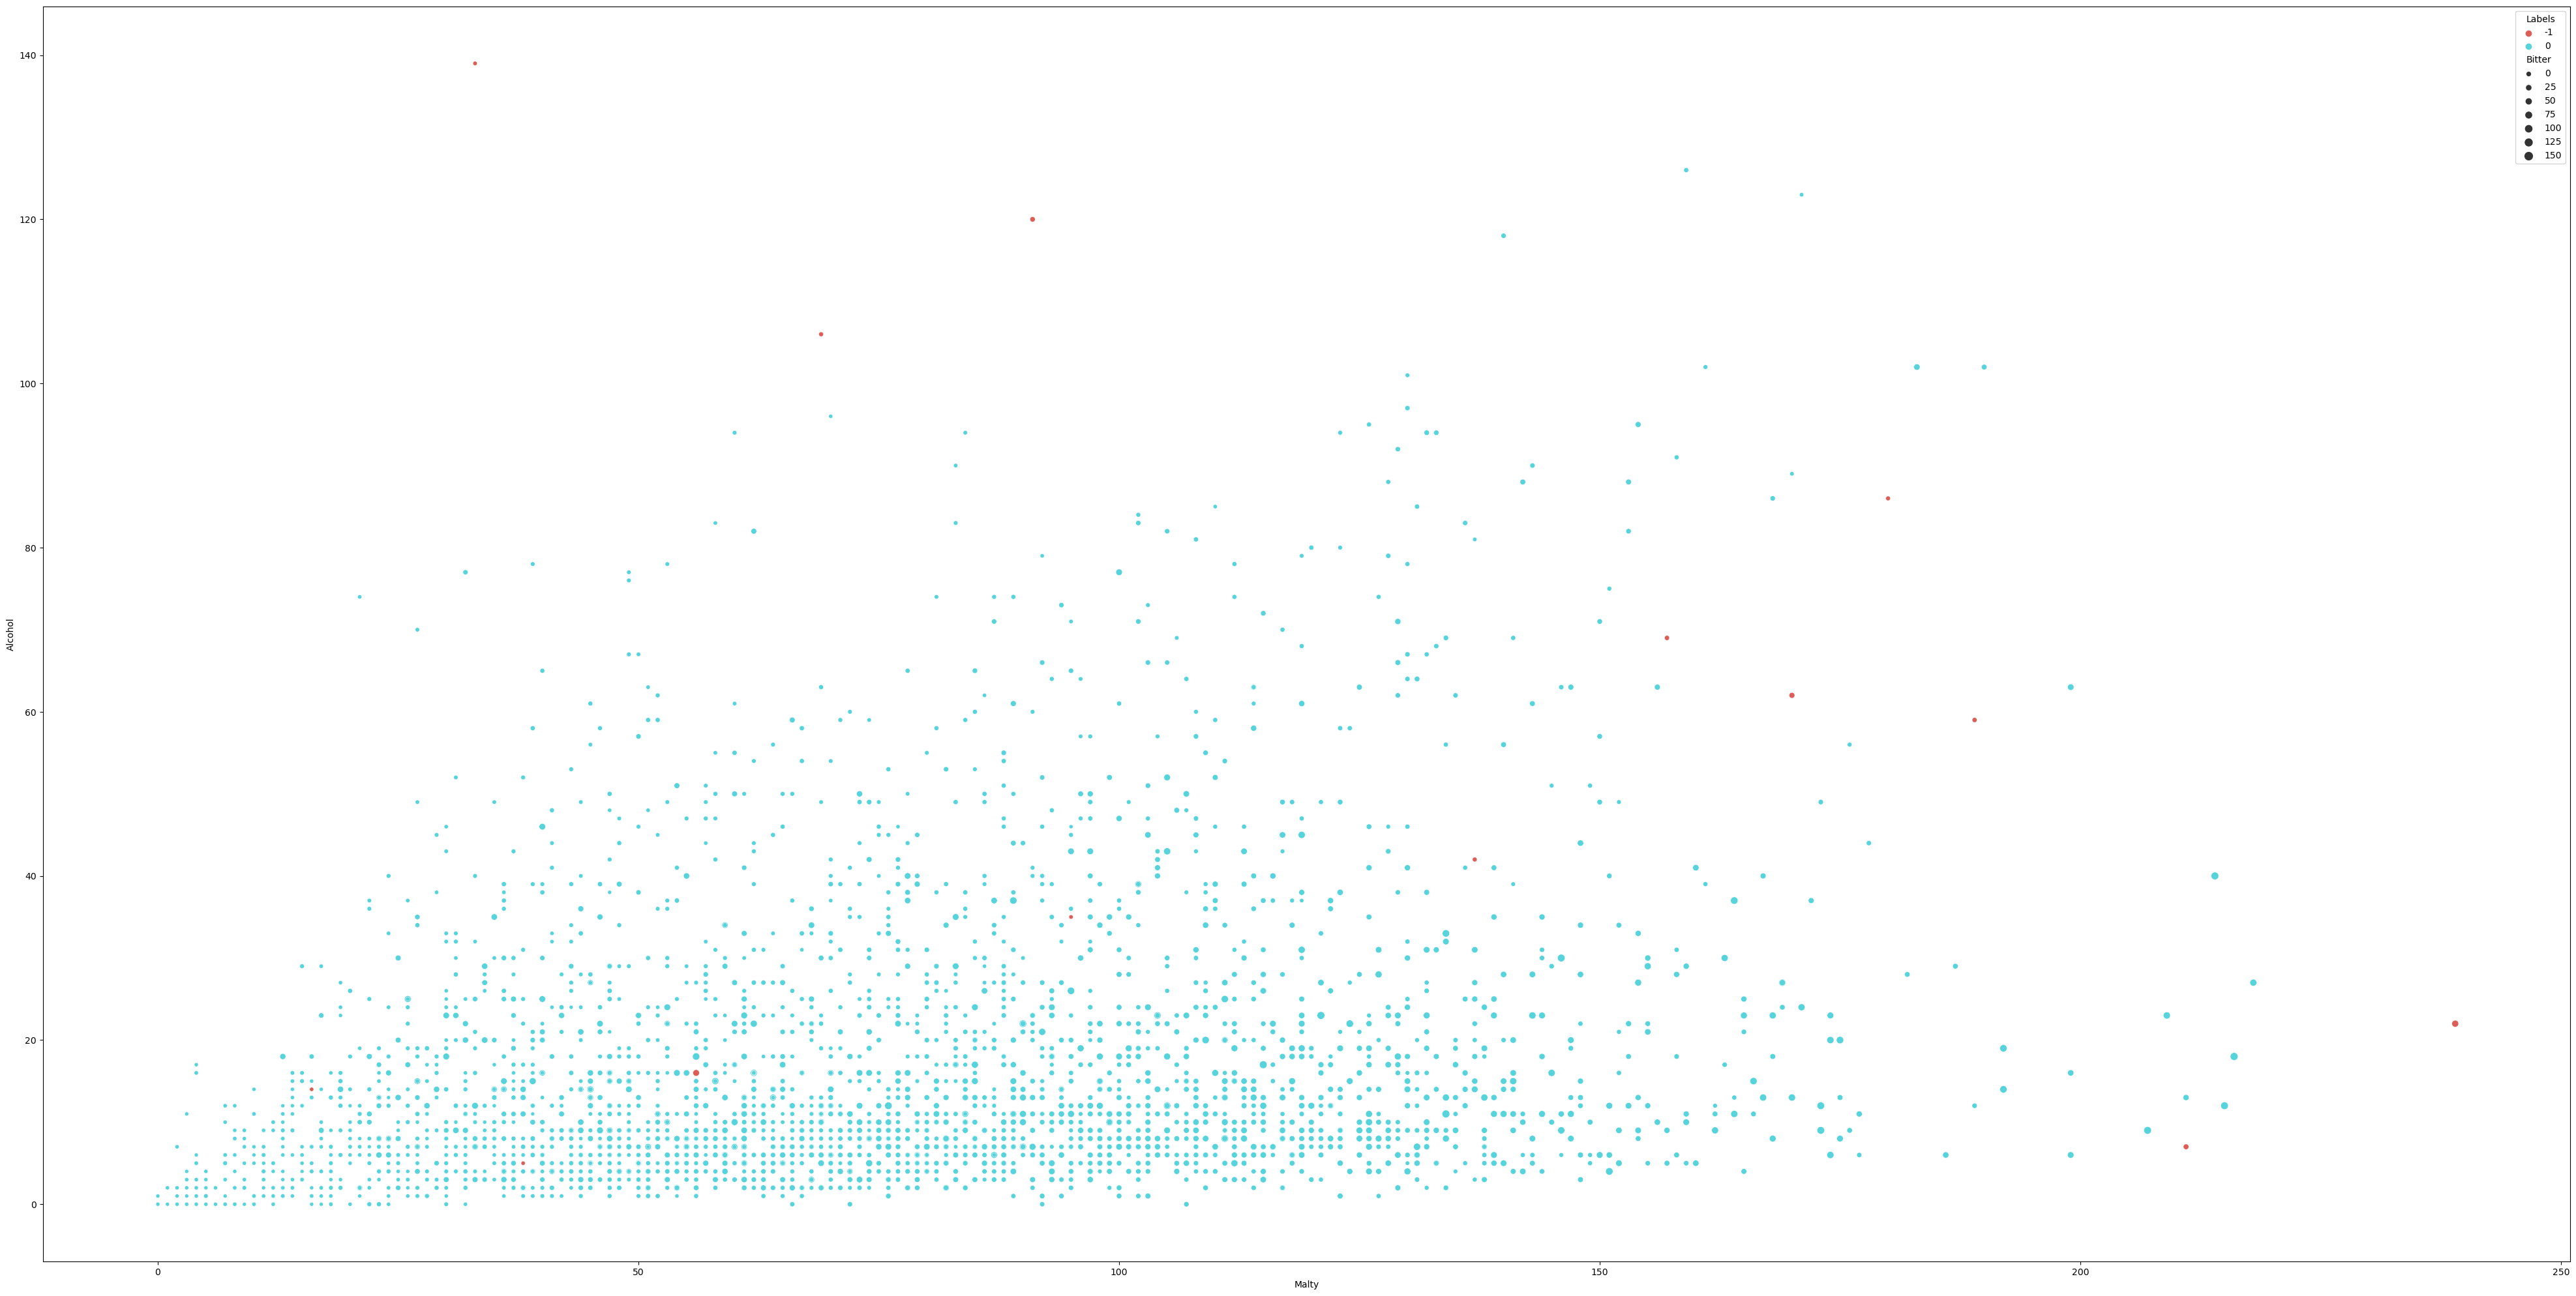

In [16]:
#DBSCAN
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=50, min_samples=25).fit(X.drop(['Labels'], axis=1))

X['Labels'] = db.labels_
plt.figure(figsize=(50, 25))
sns.scatterplot(x=X['Malty'], y=X['Alcohol'], hue=X['Labels'], size=X['Bitter'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.show()


In [17]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.5186445029362174
